# First look at MOM6 output
A series of commands to quickly look at the output of a MOM6 simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cftime

/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
rootdir = '/archive/gam/MOM6/'
config = 'channel/4th-deg'
filename_prog = 'prog.nc'
filename_vgrid = 'Vertical_coordinate.nc'
filename_hgrid = 'ocean_geometry.nc'

In [3]:
prog=xr.open_dataset(rootdir+config+'/'+filename_prog,decode_times=False)
print(prog)

<xarray.Dataset>
Dimensions:  (Time: 12, xh: 240, xq: 240, yh: 160, yq: 160, zl: 50)
Coordinates:
  * xq       (xq) float64 0.25 0.5 0.75 1.0 1.25 ... 59.0 59.25 59.5 59.75 60.0
  * yh       (yh) float64 -64.88 -64.62 -64.38 -64.12 ... -25.62 -25.38 -25.12
  * zl       (zl) float64 0.5 2.674 7.309 14.58 ... 3.588e+03 3.75e+03 3.916e+03
  * Time     (Time) float64 30.0 60.0 90.0 120.0 ... 270.0 300.0 330.0 360.0
  * xh       (xh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88
  * yq       (yq) float64 -64.75 -64.5 -64.25 -64.0 ... -25.5 -25.25 -25.0
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    SSH      (Time, yh, xh) float32 ...
    temp     (Time, zl, yh, xh) float32 ...
    salt     (Time, zl, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      channel_4th-deg
    grid_type:  regular
    grid_tile:  N/A


In [4]:
vgrid=xr.open_dataset(rootdir+config+'/'+filename_vgrid)
print(vgrid.Interface)

<xarray.DataArray 'Interface' (Interface: 51)>
array([0.000000e+00, 1.000000e+00, 4.347371e+00, 1.026988e+01, 1.889964e+01,
       3.033309e+01, 4.464699e+01, 6.190547e+01, 8.216375e+01, 1.054705e+02,
       1.318692e+02, 1.613994e+02, 1.940971e+02, 2.299956e+02, 2.691261e+02,
       3.115172e+02, 3.571963e+02, 4.061890e+02, 4.585194e+02, 5.142105e+02,
       5.732844e+02, 6.357619e+02, 7.016630e+02, 7.710069e+02, 8.438120e+02,
       9.200962e+02, 9.998765e+02, 1.083169e+03, 1.169991e+03, 1.260357e+03,
       1.354281e+03, 1.451779e+03, 1.552865e+03, 1.657552e+03, 1.765854e+03,
       1.877784e+03, 1.993354e+03, 2.112577e+03, 2.235464e+03, 2.362028e+03,
       2.492280e+03, 2.626231e+03, 2.763893e+03, 2.905275e+03, 3.050389e+03,
       3.199245e+03, 3.351853e+03, 3.508223e+03, 3.668364e+03, 3.832287e+03,
       4.000000e+03])
Coordinates:
  * Interface  (Interface) float64 0.0 1.0 4.347 ... 3.668e+03 3.832e+03 4e+03
Attributes:
    long_name:       Interface pseudo-depth, -z*
    unit

In [5]:
hgrid=xr.open_dataset(rootdir+config+'/'+filename_hgrid)
print(hgrid)

<xarray.Dataset>
Dimensions:  (lath: 160, latq: 160, lonh: 240, lonq: 240)
Coordinates:
  * lath     (lath) float64 -64.88 -64.62 -64.38 -64.12 ... -25.62 -25.38 -25.12
  * lonh     (lonh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88
  * latq     (latq) float64 -64.75 -64.5 -64.25 -64.0 ... -25.5 -25.25 -25.0
  * lonq     (lonq) float64 0.25 0.5 0.75 1.0 1.25 ... 59.25 59.5 59.75 60.0
Data variables:
    geolatb  (latq, lonq) float64 ...
    geolonb  (latq, lonq) float64 ...
    geolat   (lath, lonh) float64 ...
    geolon   (lath, lonh) float64 ...
    D        (lath, lonh) float64 ...
    f        (latq, lonq) float64 ...
    dxCv     (latq, lonh) float64 ...
    dyCu     (lath, lonq) float64 ...
    dxCu     (lath, lonq) float64 ...
    dyCv     (latq, lonh) float64 ...
    dxT      (lath, lonh) float64 ...
    dyT      (lath, lonh) float64 ...
    dxBu     (latq, lonq) float64 ...
    dyBu     (latq, lonq) float64 ...
    Ah       (lath, lonh) float64 ...
    Aq     

# Sections (x-y, y-z) at different moments in time

In [4]:
# Section (lat-depth, or lat-lon) of variable at start and end of simulation
def draw_var_times(var,clim,times,invert):
    nt = np.size(times)
    fig,ax = plt.subplots(figsize=(5*nt,10),ncols=np.size(times))
    for t in range(nt):
        im = ax[t].pcolormesh(var.isel(Time=times[t]),cmap="RdBu")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[t])
        ax[t].set_title(times[t])
        if invert:
            ax[t].invert_yaxis()

In [17]:
get_times = [0,1,2,3,4]

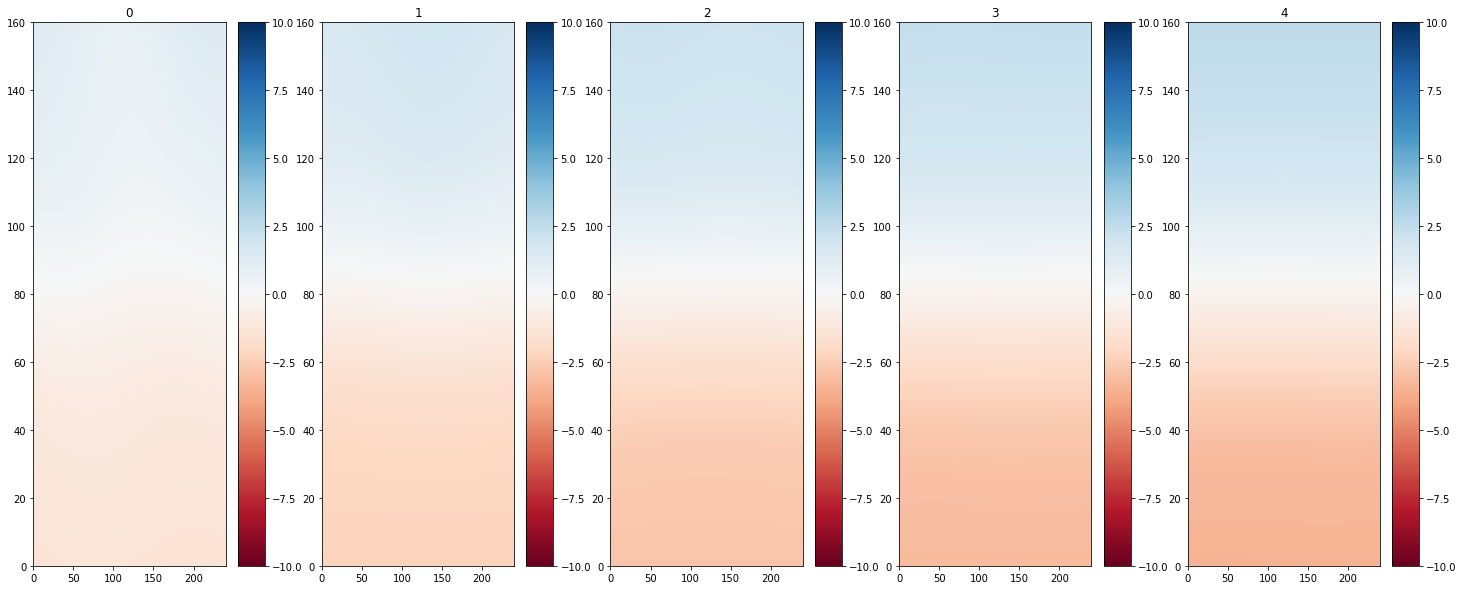

In [18]:
draw_var_times(var=prog.SSH,clim=[-10,10],times=get_times,invert=False)

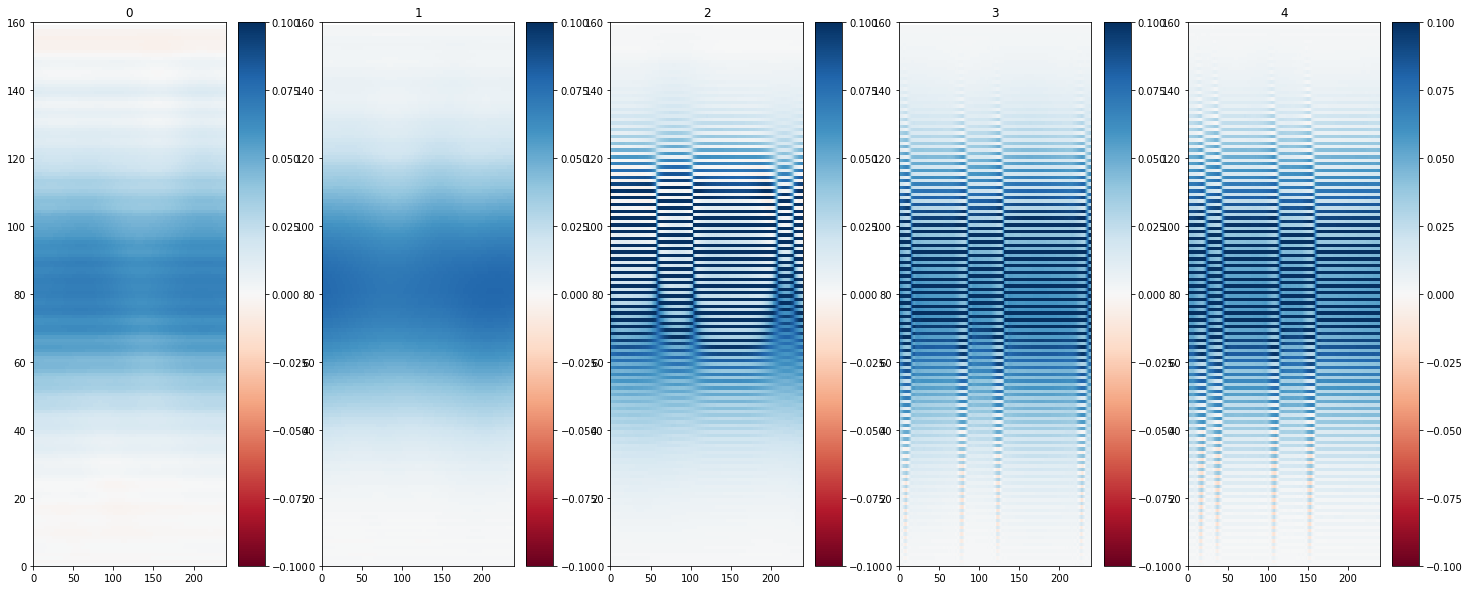

In [19]:
draw_var_times(var=prog.v.isel(zl=0),clim=[-0.1,0.1],times=get_times,invert=False)

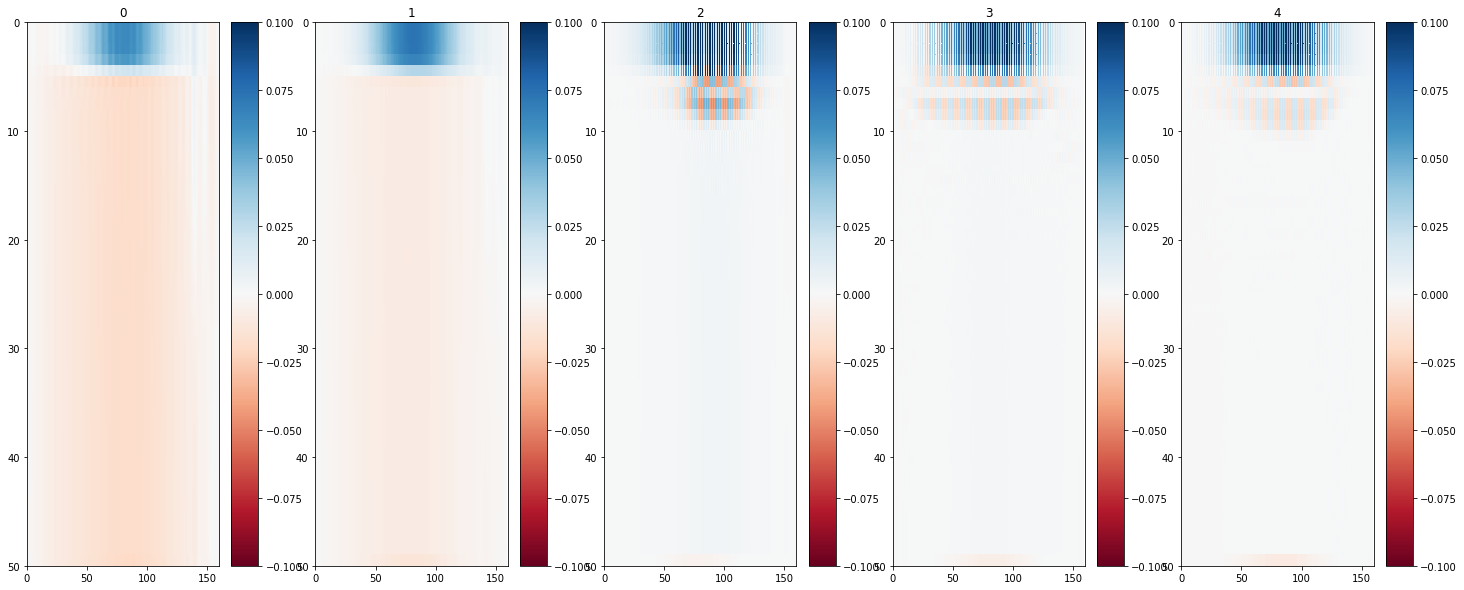

In [20]:
draw_var_times(var=prog.v.isel(xh=120),clim=[-0.1,0.1],times=get_times,invert=True)

# Depth slices at a single moment in time

In [22]:
# Section (lat-lon) of variable at different depths
def draw_var_depths(var,clim,depths):
    nk = np.size(depths)
    fig,ax = plt.subplots(figsize=(5*nk,10),ncols=np.size(depths))
    for d in range(nk):
        im = ax[d].pcolormesh(var.isel(zl=depths[d]),cmap="RdBu")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[d])
        ax[d].set_title(depths[d])

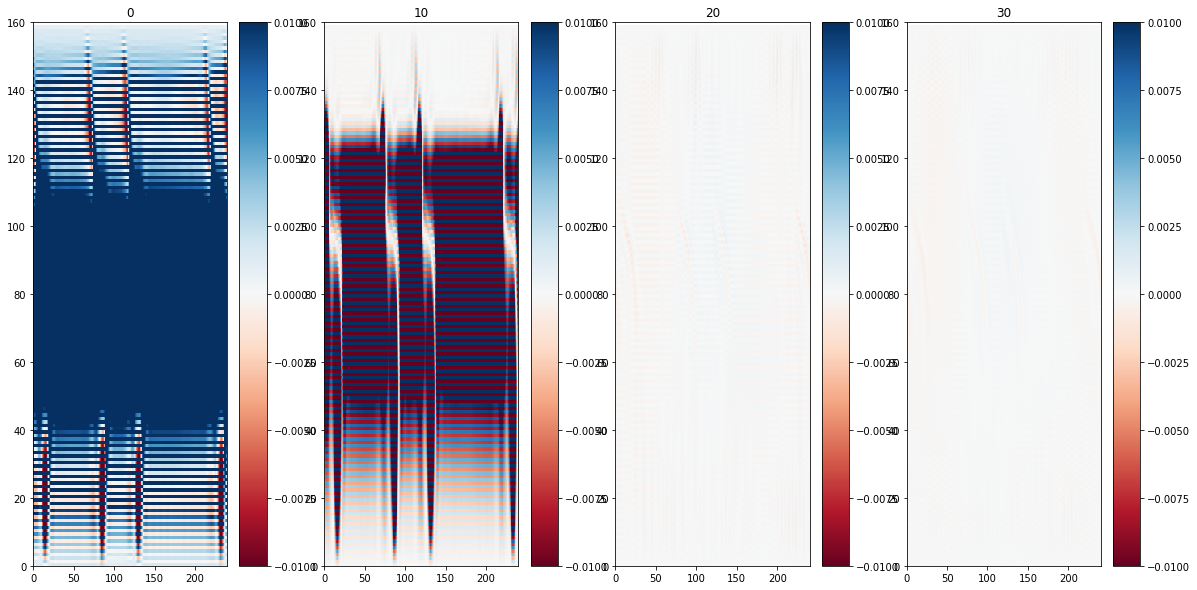

In [25]:
draw_var_depths(var=prog.v.isel(Time=11),clim=[-0.01,0.01],depths=[0, 10, 20, 30])